# COLLABORATIVE FILTERING

In [3]:
import numpy as np
import pandas as pd

# DATA 

In [4]:
column_names =['user_id','item_id','ratings','timestamp'] 
# only taking the important attributes of the dataset 
#into the dataframe
df = pd.read_csv('u.data',sep='\t',names=column_names) 
#data seperated by space

In [3]:
df.head()

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movie_titles = pd.read_csv("Movie_Titles.csv",encoding='unicode_escape')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
#merging movies_title dataset with u.dataset based on item_id
df = pd.merge(df, movie_titles,on='item_id')


In [7]:
df.head()

,user_id,item_id,ratings,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Exploratory data Analysis

In [ ]:
#importing the necessary libraries for data visualization and garphs

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #for white backgound
%matplotlib inline    # see a graphical representation
                            

UsageError: unrecognized arguments: # see a graphical representation


In [ ]:
#creating a ratings dataframe with average ratings and number of ratings

In [ ]:
df.groupby('title')['ratings'].mean().sort_values(ascending=False).head()
# we are arranging ratings in descending value

In [19]:
df.groupby('title')['ratings'].count().sort_values(ascending=False).head()
# seeing the number of ratings for each film

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: ratings, dtype: int64

In [11]:
rating = pd.DataFrame(df.groupby('title')['ratings'].mean())
rating.head()
# we are assigning the mean ratings to another dataframe

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
# adding the number of ratings attribute to the dataframe

In [12]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())
rating.head()

,ratings,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


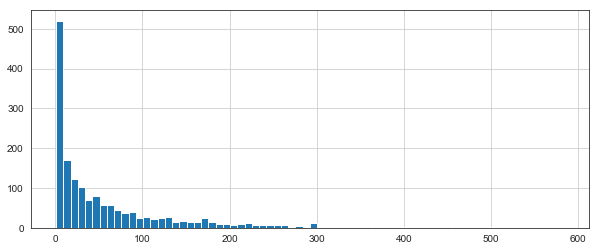

In [31]:
#plotting the data as a histogram wrt the no. of ratings
plt.figure(figsize=(10,4))
rating['num of ratings'].hist(bins=70) #using hist function present inside seaborn

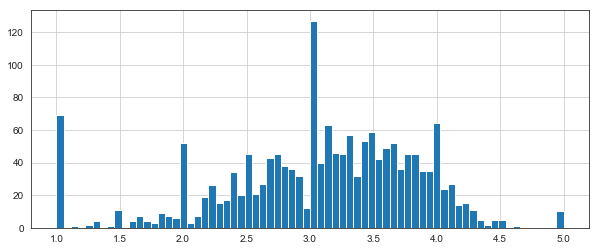

In [13]:
plt.figure(figsize=(10,4))
rating['ratings'].hist(bins=70)
#histogarm of no.of people wrt ratings 

In [34]:
# we can understand that most users have given ratings from 3 to 4 excluding the outliers
# the curve has a normal distribution 
#the probability distribution function is smooth excluding a few outliers

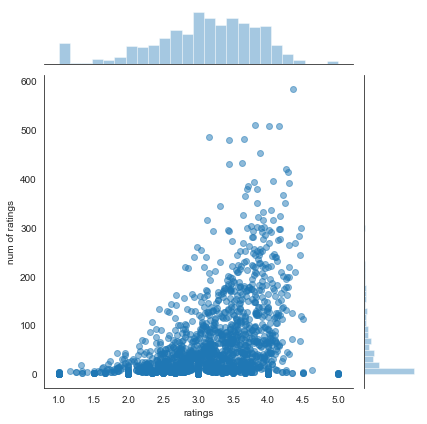

In [14]:
# making a joint plot (combination of histogram and scatter plots)
sns.jointplot(x='ratings',y='num of ratings',data=rating,alpha=0.5)
# wherever the points are dense that where most no. of ratings are given

# Giving a recommendation of similar movies

In [15]:
#making a table with respect to user_id and all the movies to identify if user has given a rating (user_id is the index here 
# for the pivot table)
moviem = df.pivot_table(index='user_id',columns='title',values='ratings')
moviem.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


In [ ]:
# the table has a lot of NAN as most users have not watched all the movies and hence cannot provide a rating
# this table is very important in giving the recommendations as based on the user ratings on certain movies other movies 
# get recommended to them

In [17]:
rating.sort_values('num of ratings',ascending=False).head(10)
# arranging ratings and number of ratings in descending order displaying first 10

,ratings,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [18]:
rating.head() 

,ratings,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [19]:
starwars_user_ratings = moviem['Star Wars (1977)'] # getting the user ratings of star wars from the main movie matrix

In [20]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [21]:
fargo_user_ratings = moviem['Fargo (1996)']
fargo_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

In [23]:
# using correlation to find similar movies to star wars and fargo using the corrwith function
similar_starwars = moviem.corrwith(starwars_user_ratings)
similar_fargo = moviem.corrwith(fargo_user_ratings)

C:\Users\Honey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Honey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
corr_starwars = pd.DataFrame(similar_starwars,columns=['Correlation']) # finding similarity using correlation
corr_starwars.dropna(inplace=True) # dropping all the NA values out  
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [ ]:
# if the user watches starwars movie then "Til There Was You" will be their next recommended movie 
#(based on user ratings and similarity) as higher the correlation more similar the movie recommended is to the watched one

In [26]:
# the correlation table can also consist of movies with less number of ratings which can decrease the accuracy 
# hence we are only considering the movies with 100 ratings and above for determining the recommendations
corr_starwars.sort_values('Correlation',ascending=False).head(10)
# these movies have high correlation and could be better recommendations

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [28]:
corr_starwars = corr_starwars.join(rating['num of ratings']) # joining no.of ratings to the correlation table 
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [30]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()
# choosing those movies which have over a 100 reviews 
# now we can see the recommendations are more similar to the watched movie

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [31]:
# finding similar recommendations for the movie fargo
corr_fargo = pd.DataFrame(similar_fargo,columns=['Correlation'])
corr_fargo.dropna(inplace=True) # dropping NA values again
corr_fargo.head()

,Correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [32]:
corr_fargo.sort_values('Correlation',ascending=False).head(10) # sorting in decreasing order of correlation
corr_fargo = corr_fargo.join(rating['num of ratings']) # joining no.of ratings to the correlation table 
corr_fargo.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [33]:
corr_fargo[corr_fargo['num of ratings']>200].sort_values('Correlation',ascending=False).head()
# this time choosing movies with more than 200 reviews

,Correlation,num of ratings
title,,
Fargo (1996),1.000000,508
"People vs. Larry Flynt, The (1996)",0.341784,215
Stand by Me (1986),0.332730,227
Amadeus (1984),0.308669,276
2001: A Space Odyssey (1968),0.299882,259


In [34]:
# finding recommendations similar to toy story
toy_story_ratings = moviem['Toy Story (1995)']
toy_story_ratings.head(10)

user_id
1     5.0
2     4.0
3     NaN
4     NaN
5     4.0
6     4.0
7     NaN
8     NaN
9     NaN
10    4.0
Name: Toy Story (1995), dtype: float64

In [36]:
similar_toystory = moviem.corrwith(toy_story_ratings)
corr_toy = pd.DataFrame(similar_toystory,columns=['Correlation'])
corr_toy.dropna(inplace=True)

In [38]:
corr_toy = corr_toy.join(rating['num of ratings'])
corr_toy[corr_toy['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
